# Arbol de decisión

Se crea un arbol de decisón basandonos en las caracteristicas de la red neuronal

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.tree import plot_tree
import numpy as np

import ast

In [100]:
# Semilla
seed = 42

Mean Absolute Error:  0.024028282612562173
R2:  -1.3436916904721738


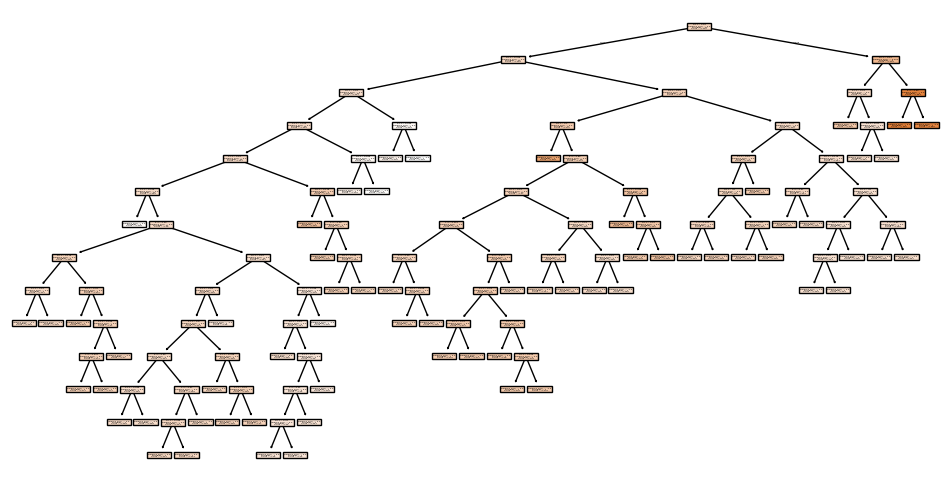

In [ ]:
# lee el df
df = pd.read_csv("./results_transformed.csv")

# Definir variables
X = df["real_codification"].apply(ast.literal_eval).apply(pd.Series)
y = df["iou"]

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Crear y entrenar arbol
model = DecisionTreeRegressor(random_state=seed)
regressor = model.fit(X_train, y_train)

# Predecir
y_pred = regressor.predict(X_test)

# Calcular error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)
r2 = r2_score(y_test, y_pred)
print("R2: ", r2)

# Visualizar el árbol de decisión
plt.figure(figsize=(12, 6))
plot_tree(regressor, feature_names=X.columns, filled=True)
plt.show()

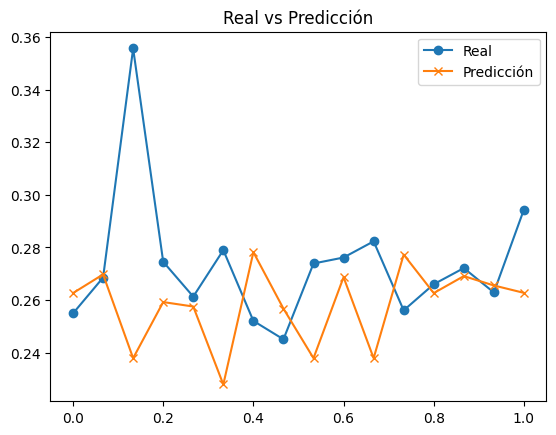

In [102]:
# Grafica de la predicción y la realidad
linespace = np.linspace(0, 1, y_pred.size)

plt.plot(linespace, y_test, label="Real", marker="o")
plt.plot(linespace, y_pred, label="Predicción", marker="x")
plt.legend()
plt.title("Real vs Predicción")
plt.show()

# Bosques aleatorios

In [103]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# lee el df
df = pd.read_csv("./results_transformed.csv")

# Definir variables
X = df["real_codification"].apply(ast.literal_eval).apply(pd.Series)
y = df["iou"]

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Crear y entrenar modelo
model = RandomForestRegressor(random_state=seed, n_estimators=100)

model.fit(X_train, y_train)

# Predecir
y_pred = model.predict(X_test)

# Calcular error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)
r2 = r2_score(y_test, y_pred)
print("R2: ", r2)

Mean Absolute Error:  0.01675912272185086
R2:  -0.2368545767262633


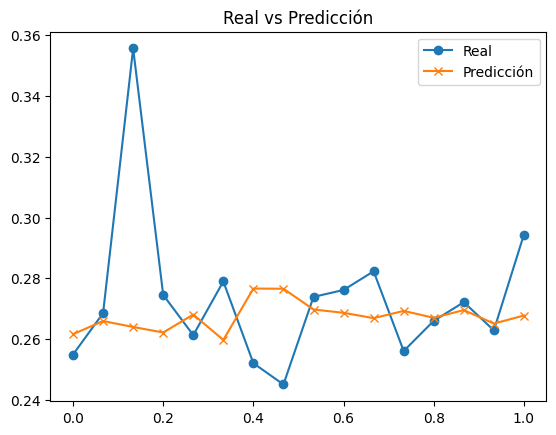

In [105]:
# Grafica de la predicción y la realidad
linespace = np.linspace(0, 1, y_pred.size)

plt.plot(linespace, y_test, label="Real", marker="o")
plt.plot(linespace, y_pred, label="Predicción", marker="x")
plt.legend()
plt.title("Real vs Predicción")
plt.show()

# XGBRegressor

In [ ]:
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

# Leer el DataFrame
df = pd.read_csv("./results_transformed.csv")

# Definir variables (expandir listas en columnas)
X = df["real_codification"].apply(ast.literal_eval).apply(pd.Series)
y = df["iou"]

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Escalar características (opcional, XGBoost maneja datos sin escalar, pero ayuda en algunos casos)
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Crear y entrenar el modelo XGBoost
model = XGBRegressor(
    n_estimators=100,      # Número de árboles (boosting rounds)
    learning_rate=0.01,     # Tasa de aprendizaje
    max_depth=3,           # Profundidad máxima de los árboles
    random_state=seed
)

model.fit(X_train_scaled, y_train)

# Predecir
y_pred = model.predict(X_test_scaled)

# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R² Score:", r2)

      0     1     2     3     4     5     6     7     8     9   ...    38  \
0   0.28  0.34  0.11  0.74  0.34  0.41  0.51  0.10  0.34  0.11  ...  0.28   
1   0.74  0.01  0.11  0.01  0.34  0.01  0.01  0.37  0.01  0.01  ...   NaN   
2   0.37  0.01  0.41  0.46  0.01  0.91  0.01  0.65  0.01  0.31  ...   NaN   
3   0.56  0.34  0.11  0.65  0.68  0.91  0.01  0.19  0.34  0.71  ...   NaN   
4   0.65  0.68  0.31  0.28  0.01  0.51  0.51  0.92  0.34  0.21  ...  0.83   
..   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
75  0.65  0.68  0.41  0.83  0.68  0.31  0.01  0.37  0.01  0.21  ...  0.92   
76  0.92  0.68  0.41  0.37  0.68  0.41  0.51  0.65  0.68  0.81  ...   NaN   
77  0.10  0.68  0.91  0.92  0.34  0.61  0.01  0.46  0.01  0.81  ...  0.19   
78  0.01  0.01  0.41  0.65  0.34  0.41  0.51  0.10  0.34  0.51  ...  0.92   
79  0.46  0.34  0.51  0.19  0.01  0.61  0.51  0.19  0.01  0.41  ...   NaN   

      39    40    41    42    43    44    45    46    47  
0   0.34  0.41  

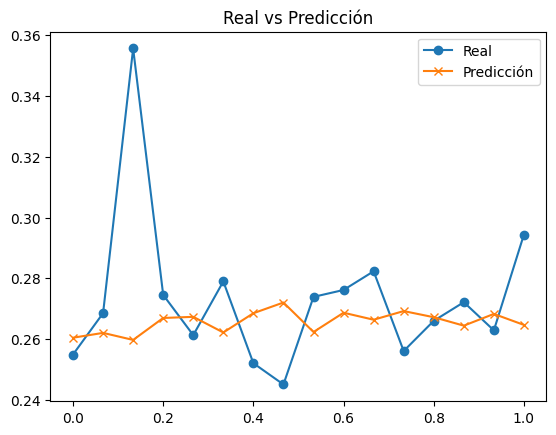

In [107]:
# Grafica de la predicción y la realidad
linespace = np.linspace(0, 1, y_pred.size)

plt.plot(linespace, y_test, label="Real", marker="o")
plt.plot(linespace, y_pred, label="Predicción", marker="x")
plt.legend()
plt.title("Real vs Predicción")
plt.show()

# Perceptrón multicapa

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Definir la red neuronal corregida
class RegressionNN(nn.Module):
    def __init__(self):
        super(RegressionNN, self).__init__()
        self.fc1 = nn.Linear(48, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x) # No se aplica función de activación para regresión
        return x

# Leer y preparar los datos
df = pd.read_csv("./results_transformed.csv")
X = df["real_codification"].apply(ast.literal_eval).apply(pd.Series).to_numpy()
X = np.nan_to_num(X, nan=-1)  # Reemplazar NaN por -1
y = df["iou"].to_numpy()

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir a tensores
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Crear DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Inicializar modelo, pérdida y optimizador
model = RegressionNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Reducir learning rate

# Entrenamiento
epochs = 300
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for inputs, targets in train_loader:  # Mini-lotes
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch} - Loss: {total_loss / len(train_loader)}")

# Evaluación
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor).numpy()

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae:.4f}, R²: {r2:.4f}")

Epoch 0 - Loss: 0.12210288271307945
Epoch 10 - Loss: 0.012802591547369957
Epoch 20 - Loss: 0.0026224841130897403
Epoch 30 - Loss: 0.0018049199134111404
Epoch 40 - Loss: 0.0015627467655576766
Epoch 50 - Loss: 0.0013961064396426082
Epoch 60 - Loss: 0.0012545736972242594
Epoch 70 - Loss: 0.0011173099046573043
Epoch 80 - Loss: 0.0009883500169962645
Epoch 90 - Loss: 0.0008634409168735147
Epoch 100 - Loss: 0.0007440373883582652
Epoch 110 - Loss: 0.0006080997118260711
Epoch 120 - Loss: 0.0004952699382556602
Epoch 130 - Loss: 0.00039556442061439157
Epoch 140 - Loss: 0.0003188729315297678
Epoch 150 - Loss: 0.0002560415814514272
Epoch 160 - Loss: 0.00019637902732938528
Epoch 170 - Loss: 0.0001557072828290984
Epoch 180 - Loss: 0.00012404680455802009
Epoch 190 - Loss: 9.93709581962321e-05
Epoch 200 - Loss: 8.030356912058778e-05
Epoch 210 - Loss: 6.559530993399676e-05
Epoch 220 - Loss: 5.4424106565420516e-05
Epoch 230 - Loss: 4.58019130746834e-05
Epoch 240 - Loss: 3.962875598517712e-05
Epoch 250 - 

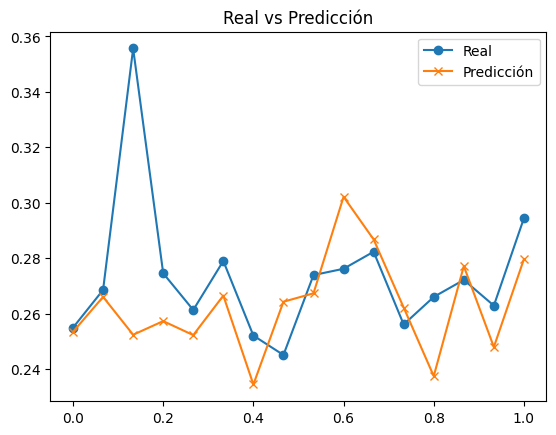

In [123]:
# Grafica de la predicción y la realidad
linespace = np.linspace(0, 1, y_pred.size)

plt.plot(linespace, y_test, label="Real", marker="o")
plt.plot(linespace, y_pred, label="Predicción", marker="x")
plt.legend()
plt.title("Real vs Predicción")
plt.show()